In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
import numpy as np

In [18]:
(X_train,_),(_,_) = mnist.load_data()

In [19]:

print(X_train.shape)
print(type(X_train))

X_train = X_train.reshape((60000,28,28,1))
print(X_train.shape)

(60000, 28, 28)
<class 'numpy.ndarray'>
(60000, 28, 28)


In [20]:
#Normalize the Data between -1 and 1

X_train = (X_train.astype('float32') - 127.5)/127.5

print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [5]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE))
HALF_BATCH = int(BATCH_SIZE/2)
NOISE_DIM = 100

adam = Adam(lr=2e-4,beta_1=0.5)

In [10]:
# Generator => Upsampling
# 100dim -> 28,28,1

generator = Sequential()
generator.add(Dense(7*7*128, input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# 7,7,128 => 14,14,64
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=(3,3), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# 14,14,64 => 28,28,1
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=(3,3), padding='same', activation='tanh'))

generator.compile(loss="binary_crossentropy", optimizer = adam)
generator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 14, 14, 64)       

In [12]:
# Discriminator - Downsampling

# 28,28,1 => 14,14,64
discriminator = Sequential()
discriminator.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

# 14,14,64 => 7,7,128
discriminator.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss="binary_crossentropy", optimizer=adam)
discriminator.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6273      
Total params: 80,769
Trainable params: 80,769
Non-trainable params: 0
__________________________________________________

In [13]:
discriminator.trainable = False

gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [14]:
def display_images(samples = 100):
    noise = np.random.normal(0,1, size = (samples, NOISE_DIM))
    
    generated_img = generator.predict(noise)
    
    
    plt.figure(figsize=(10,10))
    
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_img[i].reshape(28,28),interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.show()

Epoch 1 Disc loss 0.5405863627474359, Generator Loss 0.7152873557060957
Epoch 2 Disc loss 0.7249931045035098, Generator Loss 0.7673277258872986
Epoch 3 Disc loss 0.7154051968391906, Generator Loss 0.8042051794473082
Epoch 4 Disc loss 0.6999255403559259, Generator Loss 0.7979695540852845
Epoch 5 Disc loss 0.69828353372026, Generator Loss 0.7782515028957278
Epoch 6 Disc loss 0.6993754541620295, Generator Loss 0.7696557657327503
Epoch 7 Disc loss 0.6991642561364682, Generator Loss 0.7655103257857263
Epoch 8 Disc loss 0.6985867024736202, Generator Loss 0.7601457049604505
Epoch 9 Disc loss 0.697353469057286, Generator Loss 0.7562131502199918
Epoch 10 Disc loss 0.6963793301835973, Generator Loss 0.7544423234649003


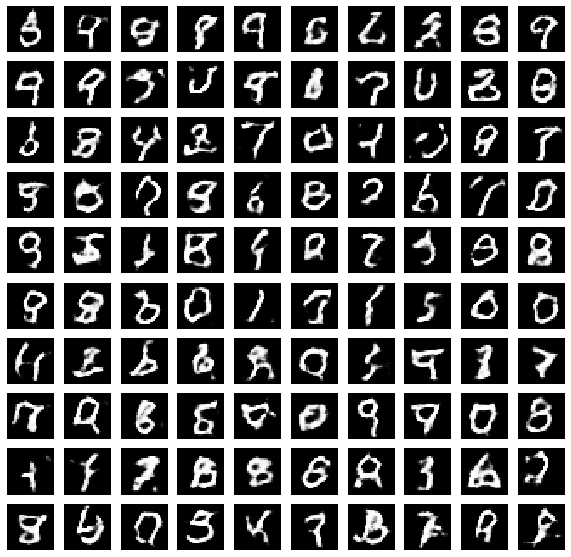

Epoch 11 Disc loss 0.695265952830619, Generator Loss 0.7521367645822465
Epoch 12 Disc loss 0.6945193120773803, Generator Loss 0.750114023918286
Epoch 13 Disc loss 0.6936738016757559, Generator Loss 0.7491270618047565
Epoch 14 Disc loss 0.6929940417725989, Generator Loss 0.7483464442193508
Epoch 15 Disc loss 0.692158061139127, Generator Loss 0.7479109112173319
Epoch 16 Disc loss 0.6913107584131525, Generator Loss 0.7475499869324267
Epoch 17 Disc loss 0.6899655816402841, Generator Loss 0.7527382846456021
Epoch 18 Disc loss 0.6897177252363651, Generator Loss 0.7465902718249708
Epoch 19 Disc loss 0.6894159768490081, Generator Loss 0.7472590690013021
Epoch 20 Disc loss 0.6886972488240993, Generator Loss 0.7482127388939261


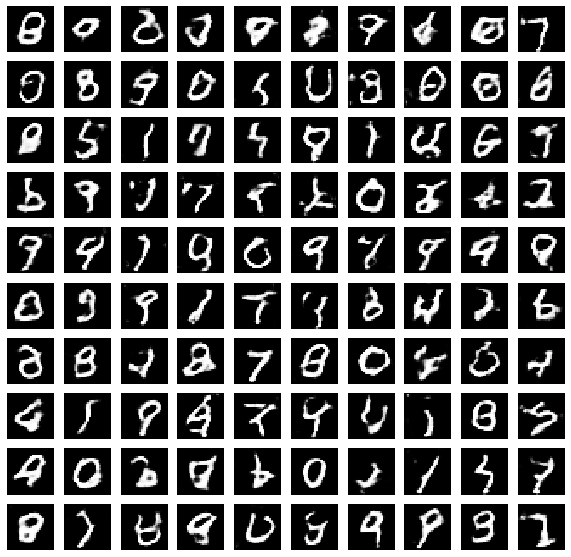

Epoch 21 Disc loss 0.6881193159742558, Generator Loss 0.7484788205474615
Epoch 22 Disc loss 0.6875859732323505, Generator Loss 0.7489940605591983
Epoch 23 Disc loss 0.6859458484548203, Generator Loss 0.7605604531709105
Epoch 24 Disc loss 0.686720746121508, Generator Loss 0.7480784012004733
Epoch 25 Disc loss 0.6861618573361254, Generator Loss 0.7504144401755184
Epoch 26 Disc loss 0.6839692484191123, Generator Loss 0.7657354800030589
Epoch 27 Disc loss 0.6852220691264944, Generator Loss 0.7508121978025883
Epoch 28 Disc loss 0.6843799799046618, Generator Loss 0.7548473661299795
Epoch 29 Disc loss 0.6831306036482466, Generator Loss 0.7591679014731199
Epoch 30 Disc loss 0.6825601322853819, Generator Loss 0.7611965870019048


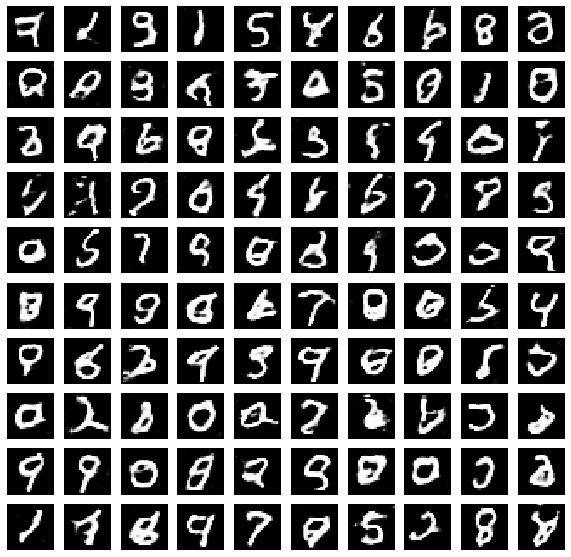

Epoch 31 Disc loss 0.6823942895899427, Generator Loss 0.7599135776981711
Epoch 32 Disc loss 0.681455549534331, Generator Loss 0.7615585899911821
Epoch 33 Disc loss 0.6776924261387358, Generator Loss 0.7862591703888029
Epoch 34 Disc loss 0.679782731101868, Generator Loss 0.7633210688363761
Epoch 35 Disc loss 0.6783591323710503, Generator Loss 0.769414396956563
Epoch 36 Disc loss 0.6774503479612635, Generator Loss 0.7716638634447008
Epoch 37 Disc loss 0.6762570204886984, Generator Loss 0.7750630199443549
Epoch 38 Disc loss 0.6706019070554287, Generator Loss 0.8081332198344171
Epoch 39 Disc loss 0.6733767037696027, Generator Loss 0.7798125047702342
Epoch 40 Disc loss 0.6724479944147962, Generator Loss 0.784289977978915


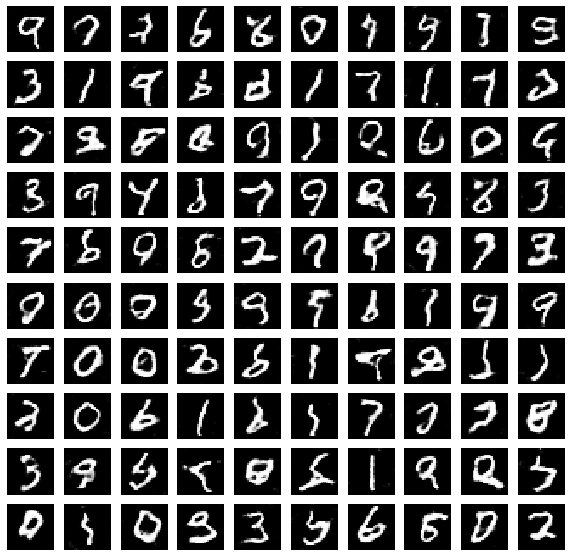

Epoch 41 Disc loss 0.6707828062645933, Generator Loss 0.7882833583280444
Epoch 42 Disc loss 0.6694643082770896, Generator Loss 0.7938881625887007
Epoch 43 Disc loss 0.6674901430911206, Generator Loss 0.7976886157412082
Epoch 44 Disc loss 0.6664351957909604, Generator Loss 0.8023317179176956
Epoch 45 Disc loss 0.6645751742606467, Generator Loss 0.8067455017007887
Epoch 46 Disc loss 0.6625489964130077, Generator Loss 0.8113940053153783
Epoch 47 Disc loss 0.6604052061730242, Generator Loss 0.8185343069490045
Epoch 48 Disc loss 0.6559795751216564, Generator Loss 0.8431433103978634
Epoch 49 Disc loss 0.6570100415260234, Generator Loss 0.8263853865209967
Epoch 50 Disc loss 0.655690558793697, Generator Loss 0.8300403386820108


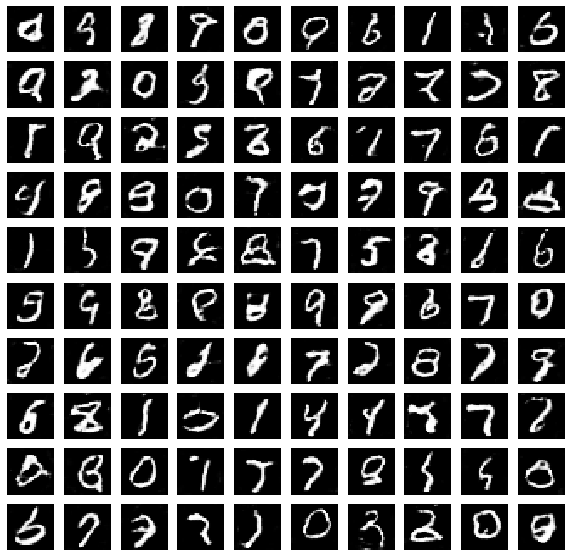

In [21]:
# Training LOOP

d_losses = []
g_losses = []

for epoch in range(TOTAL_EPOCHS):
    
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    
    # Mini batch gradient descent
    for step in range(NO_OF_BATCHES):
        
        
        # Training Step -1 [Train Discriminator]
        
        # Get real Data (X)
        idx  = np.random.randint(0, X_train.shape[0], HALF_BATCH )
        real_imgs = X_train[idx]
        
        # Get Fake images 
        noise = np.random.normal(0, 1, size= (HALF_BATCH, NOISE_DIM))
        fake_images = generator.predict(noise)
        
        # Labels
        real_y = np.ones((HALF_BATCH, 1))*0.9 # one side label smoothing
        fake_y = np.zeros((HALF_BATCH, 1))
        
        # Train our Discriminatior
        d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_y)
        
        d_loss= 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        
        # Training  Step - 2 Generator ( Discriminator is Frozen)
        
        noise = np.random.normal(0, 1, size= (BATCH_SIZE, NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE, 1))
        g_loss = model.train_on_batch(noise, ground_truth_y)
        epoch_g_loss += g_loss
        
    
    print("Epoch {} Disc loss {}, Generator Loss {}".format((epoch+1), epoch_d_loss/NO_OF_BATCHES, epoch_g_loss/BATCH_SIZE))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if(epoch+1)%10==0:
        generator.save("model.h5")
        display_images()

In [22]:
from keras.models import load_model

In [23]:
my_model_new = load_model("model.h5")

In [33]:
noise = np.random.normal(0, 1, size= (1, NOISE_DIM))

In [34]:
gen_img = my_model_new.predict(noise)

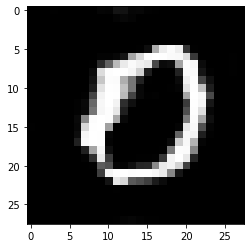

In [36]:
plt.imshow(gen_img[0].reshape(28,28), cmap="gray")